In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import plot_tree

In [2]:
import random
random.seed(42)

In [3]:
data_types = pd.read_excel('data/Copy of Data Columns, Types.xlsx', engine = 'openpyxl')
data = pd.read_excel('data/StudentData - TO MODEL.xlsx', engine = 'openpyxl')
data_prediction = pd.read_excel('data/StudentEvaluation- TO PREDICT.xlsx', engine = 'openpyxl')

In [4]:
data_types

,Name,Type,MD code,Length,Measurement Type,Excluded
0,Brand Code,Double,-9999,8,General,Categorical
1,Carb Volume,Double,-9999,8,General,Auto
2,Fill Ounces,Double,-9999,8,General,Auto
3,PC Volume,Double,-9999,8,General,Auto
4,Carb Pressure,Double,-9999,8,General,Auto
5,Carb Temp,Double,-9999,8,General,Auto
6,PSC,Double,-9999,8,General,Auto
7,PSC Fill,Double,-9999,8,General,Auto
8,PSC CO2,Double,-9999,8,General,Auto
9,Mnf Flow,Double,-9999,8,General,Auto


In [5]:
data

,Brand Code,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,...,Balling,Pressure Vacuum,PH,Oxygen Filler,Bowl Setpoint,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl
0,B,5.340000,23.966667,0.263333,68.2,141.2,0.104,0.26,0.04,-100.0,...,1.398,-4.0,8.36,0.0220,120.0,46.4,142.6,6.58,5.32,1.48
1,A,5.426667,24.006667,0.238667,68.4,139.6,0.124,0.22,0.04,-100.0,...,1.498,-4.0,8.26,0.0260,120.0,46.8,143.0,6.56,5.30,1.56
2,B,5.286667,24.060000,0.263333,70.8,144.8,0.090,0.34,0.16,-100.0,...,3.142,-3.8,8.94,0.0240,120.0,46.6,142.0,7.66,5.84,3.28
3,A,5.440000,24.006667,0.293333,63.0,132.6,NaN,0.42,0.04,-100.0,...,3.042,-4.4,8.24,0.0300,120.0,46.0,146.2,7.14,5.42,3.04
4,A,5.486667,24.313333,0.111333,67.2,136.8,0.026,0.16,0.12,-100.0,...,3.042,-4.4,8.26,0.0300,120.0,46.0,146.2,7.14,5.44,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,NaN,5.500000,24.040000,0.248667,74.8,145.8,0.172,0.36,0.04,136.0,...,2.366,-5.8,8.86,0.0026,110.0,50.0,141.8,7.72,5.56,1.62
2567,NaN,5.506667,23.980000,0.254000,74.4,146.0,0.108,0.22,0.02,138.8,...,2.016,-5.6,8.88,0.0026,110.0,50.0,142.6,7.68,5.58,1.78
2568,B,5.346667,24.040000,0.280667,68.0,141.8,0.032,0.28,0.02,143.8,...,1.516,-5.6,8.68,0.0026,110.0,50.0,143.0,6.56,5.36,1.28
2569,B,5.366667,24.026667,0.264667,68.2,141.6,0.040,0.32,0.02,147.2,...,1.566,-5.4,8.56,0.0026,110.0,50.0,142.8,6.56,5.36,1.28


In [6]:
data.columns

Index(['Brand Code', 'Carb Volume', 'Fill Ounces', 'PC Volume',
       'Carb Pressure', 'Carb Temp', 'PSC', 'PSC Fill', 'PSC CO2', 'Mnf Flow',
       'Carb Pressure1', 'Fill Pressure', 'Hyd Pressure1', 'Hyd Pressure2',
       'Hyd Pressure3', 'Hyd Pressure4', 'Filler Level', 'Filler Speed',
       'Temperature', 'Usage cont', 'Carb Flow', 'Density', 'MFR', 'Balling',
       'Pressure Vacuum', 'PH', 'Oxygen Filler', 'Bowl Setpoint',
       'Pressure Setpoint', 'Air Pressurer', 'Alch Rel', 'Carb Rel',
       'Balling Lvl'],
      dtype='object')

In [7]:
data.isnull().sum()

Brand Code           120
Carb Volume           10
Fill Ounces           38
PC Volume             39
Carb Pressure         27
Carb Temp             26
PSC                   33
PSC Fill              23
PSC CO2               39
Mnf Flow               2
Carb Pressure1        32
Fill Pressure         22
Hyd Pressure1         11
Hyd Pressure2         15
Hyd Pressure3         15
Hyd Pressure4         30
Filler Level          20
Filler Speed          57
Temperature           14
Usage cont             5
Carb Flow              2
Density                1
MFR                  212
Balling                1
Pressure Vacuum        0
PH                     4
Oxygen Filler         12
Bowl Setpoint          2
Pressure Setpoint     12
Air Pressurer          0
Alch Rel               9
Carb Rel              10
Balling Lvl            1
dtype: int64

In [8]:
data.loc[data['Brand Code'].isnull(), 'Brand Code'] = 'U'

In [9]:
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
# imputer = KNNImputer(n_neighbors = 5)
imputer = IterativeImputer(random_state = 42, max_iter = 50)

data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

In [10]:
X = data[[x for x in data.columns if x != 'PH']]
y = data['PH']

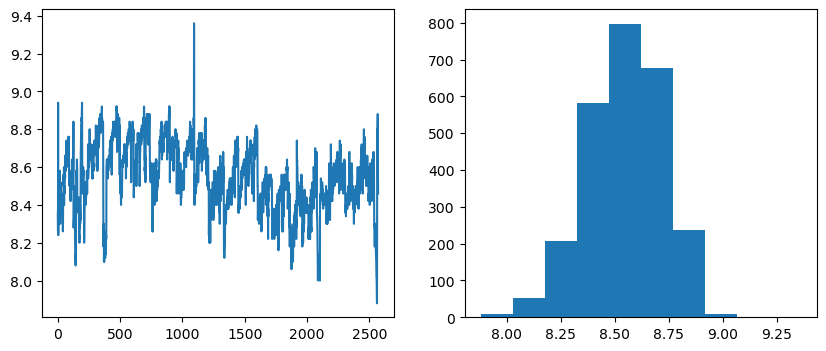

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
ax[0].plot(data['PH'])
ax[1].hist(data['PH'])
plt.show()

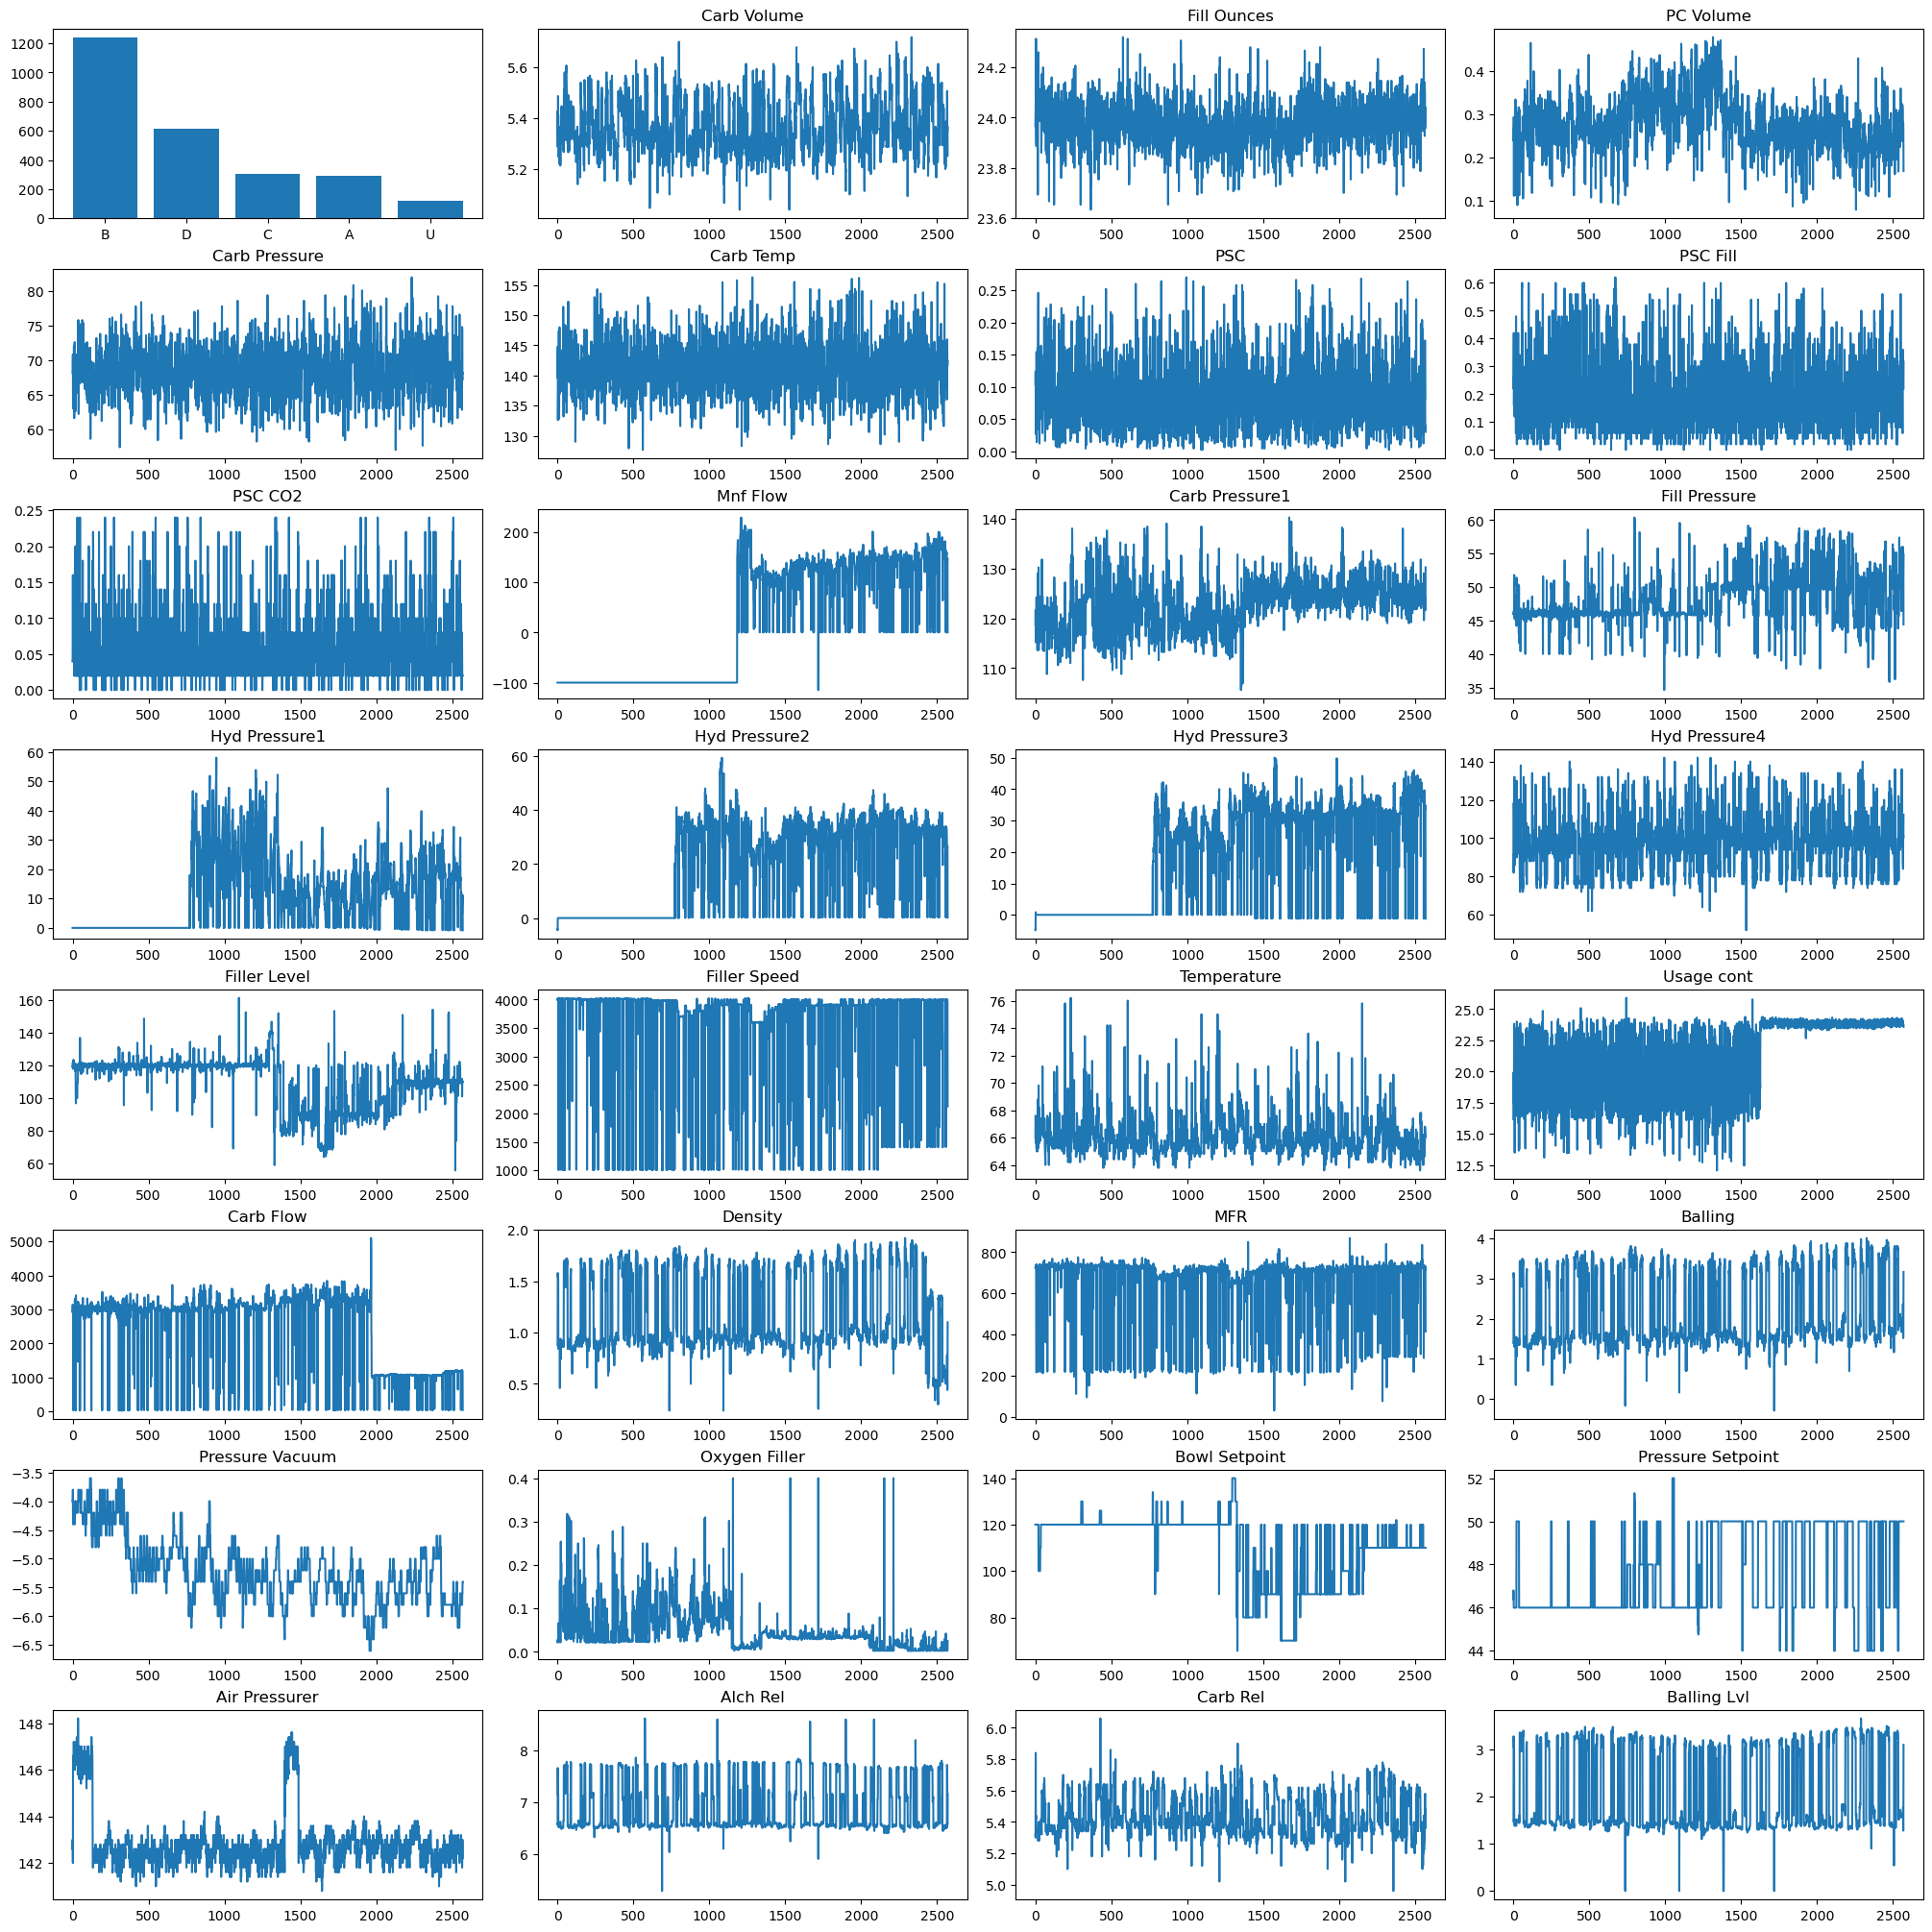

In [12]:
fig, axes = plt.subplots(8, 4, figsize = (20,20), constrained_layout = True)

for col, ax in zip(X, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.plot(X[col])
        ax.set_title(col)

plt.show()

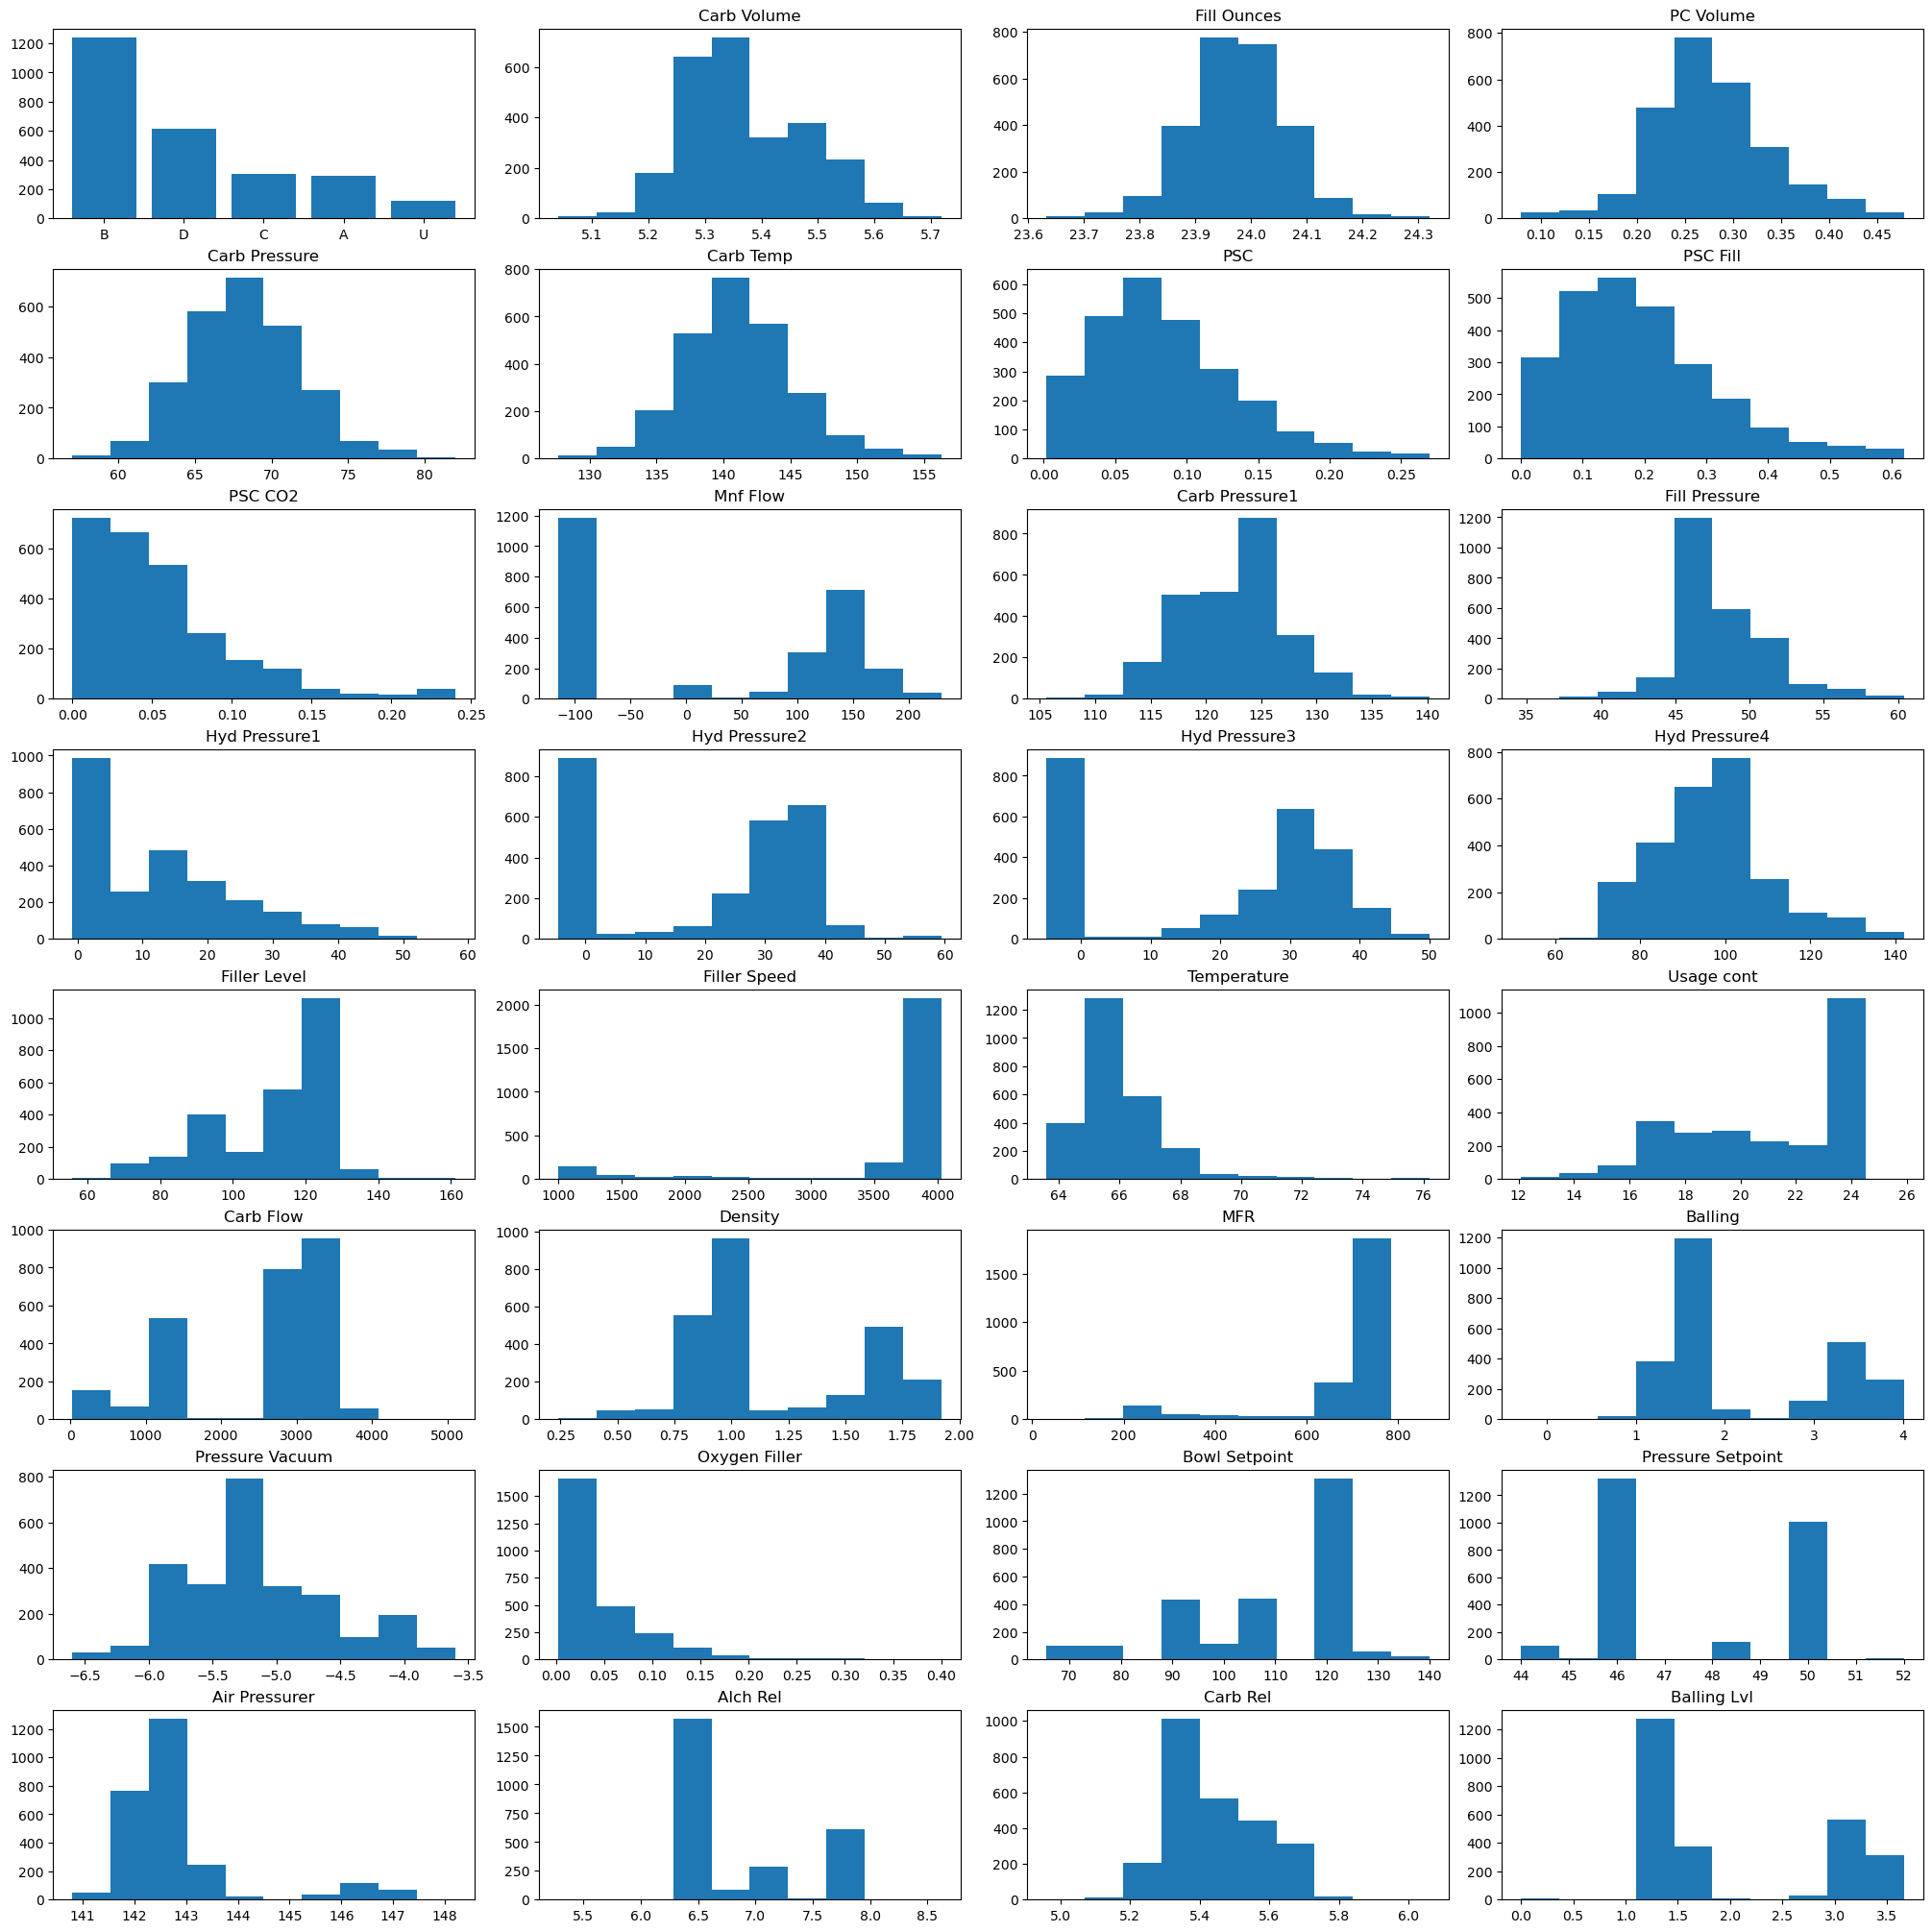

In [13]:
fig, axes = plt.subplots(8, 4, figsize = (20,20), constrained_layout = True)

for col, ax in zip(X, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.hist(X[col])
        ax.set_title(col)

plt.show()

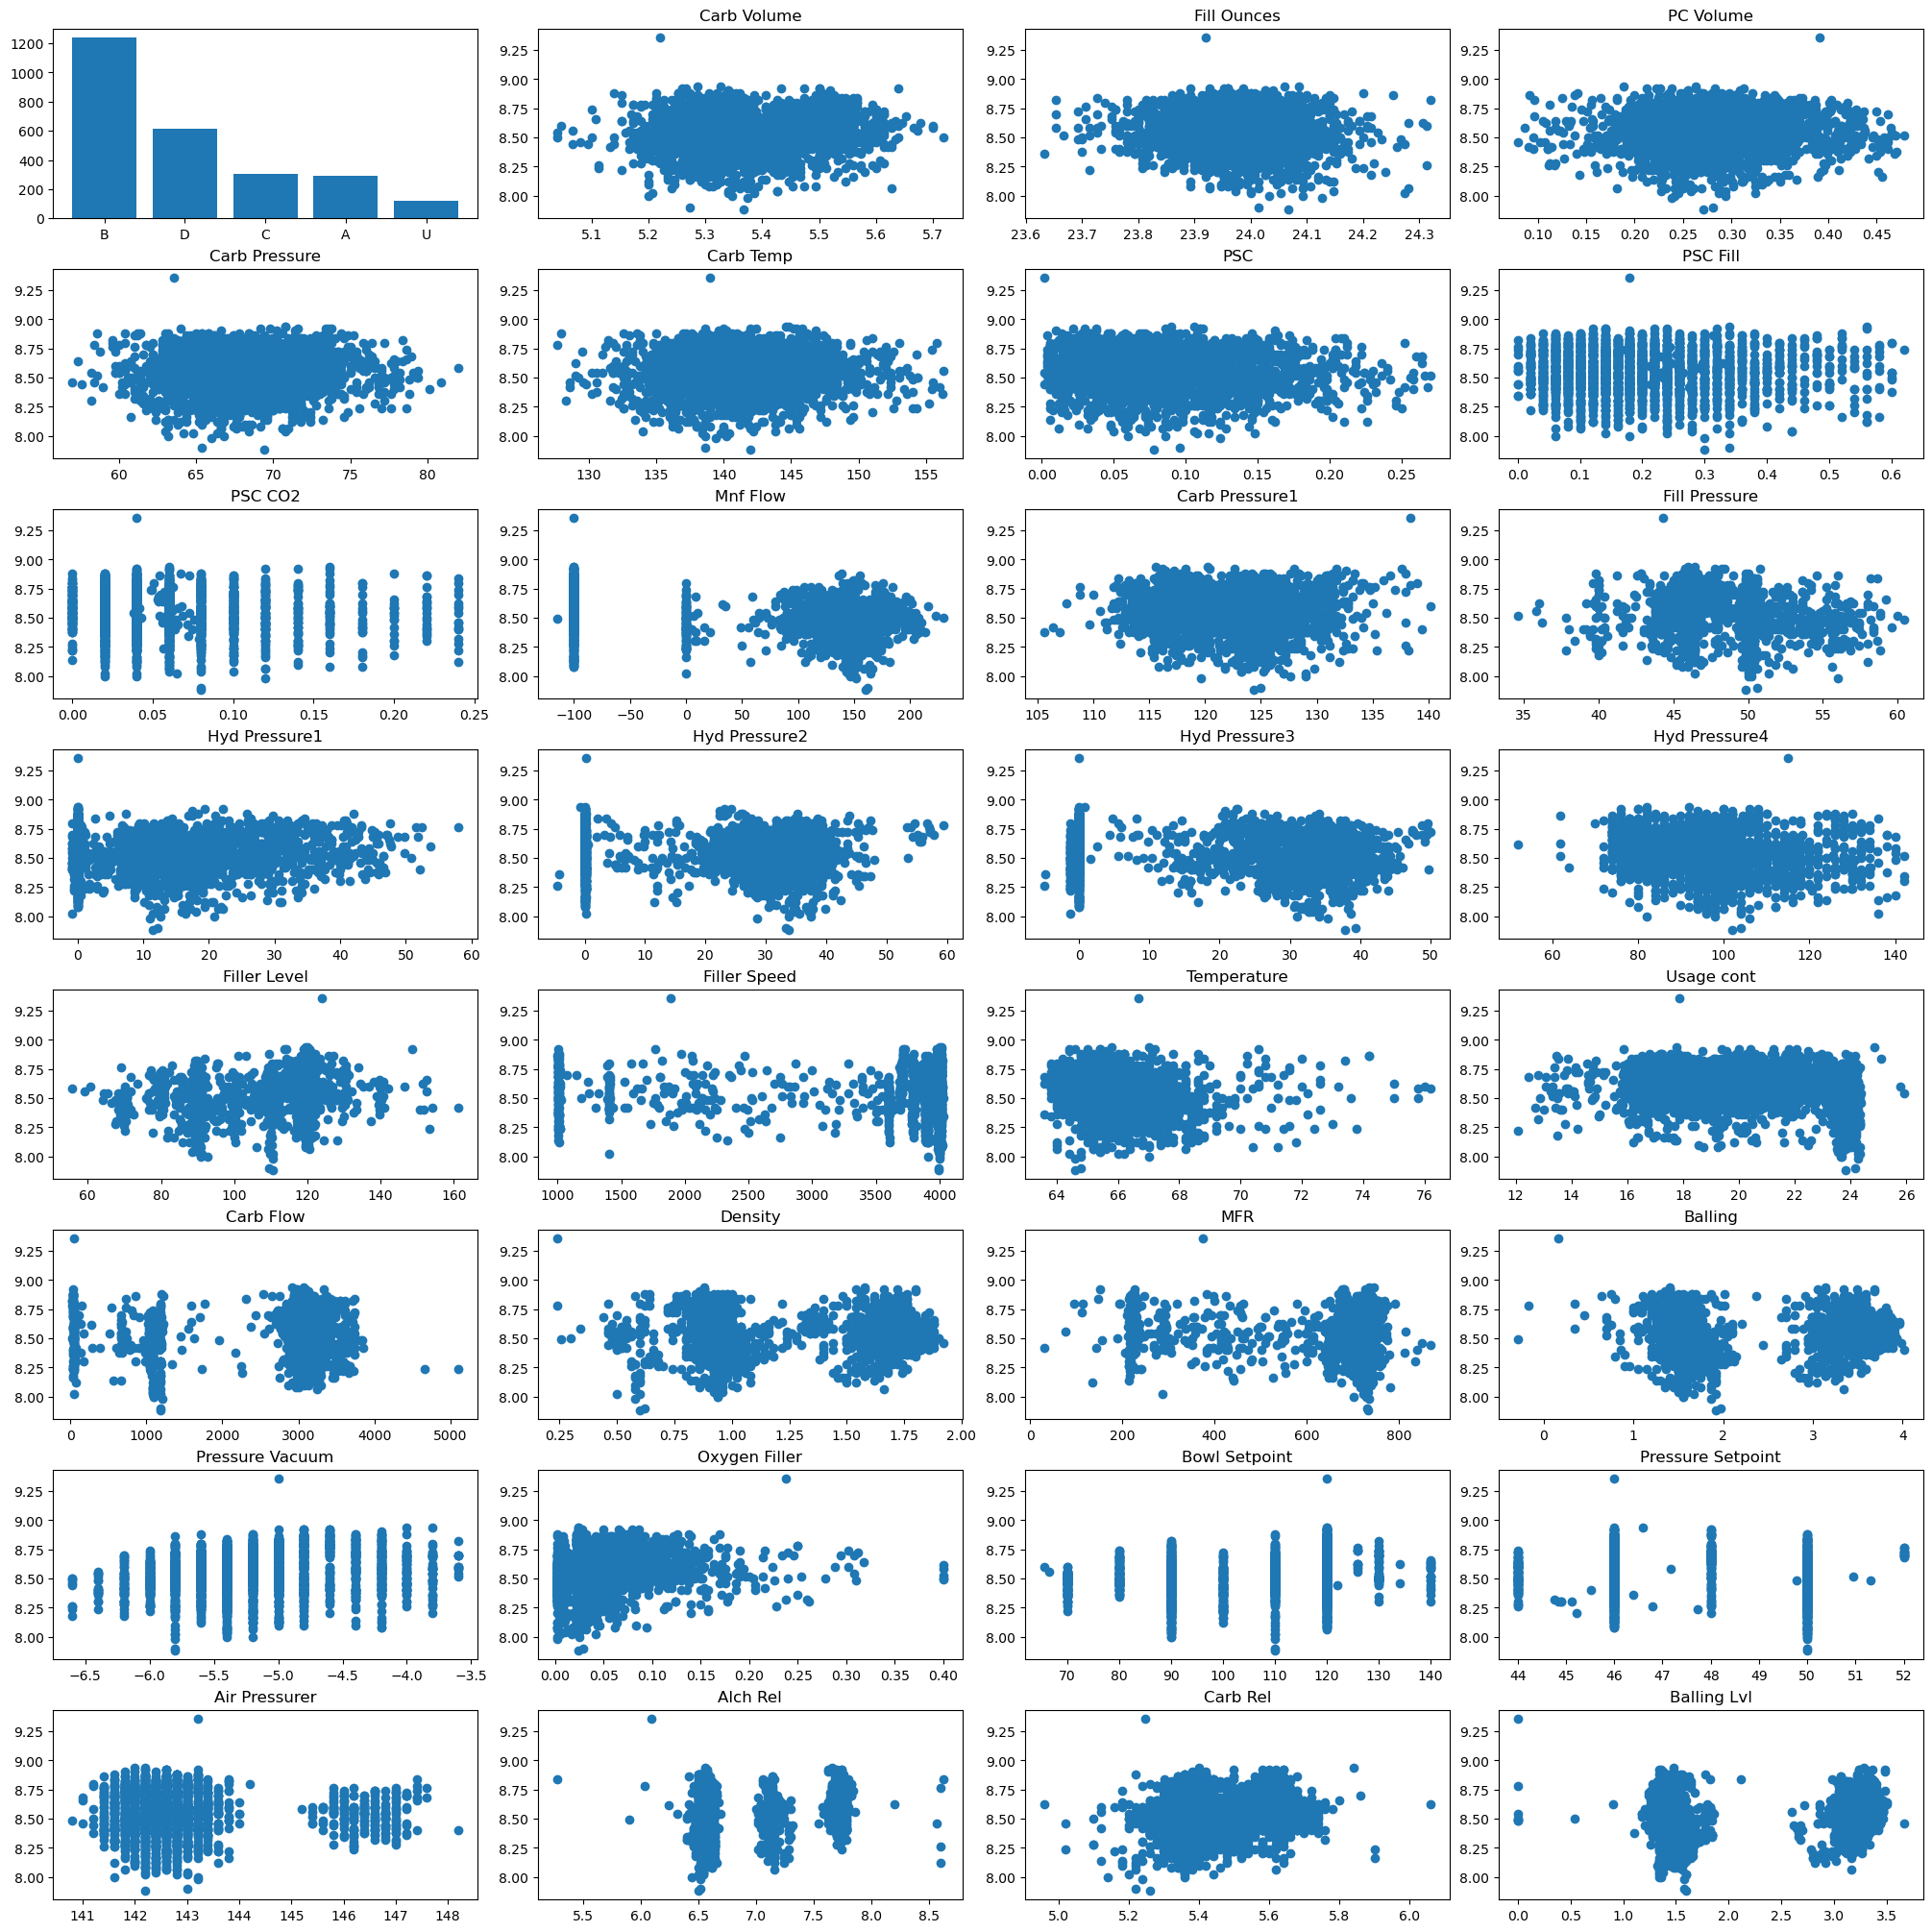

In [14]:
fig, axes = plt.subplots(8, 4, figsize = (20,20), constrained_layout = True)

for col, ax in zip(X, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.scatter(X[col], y)
        ax.set_title(col)

plt.show()

<AxesSubplot:>

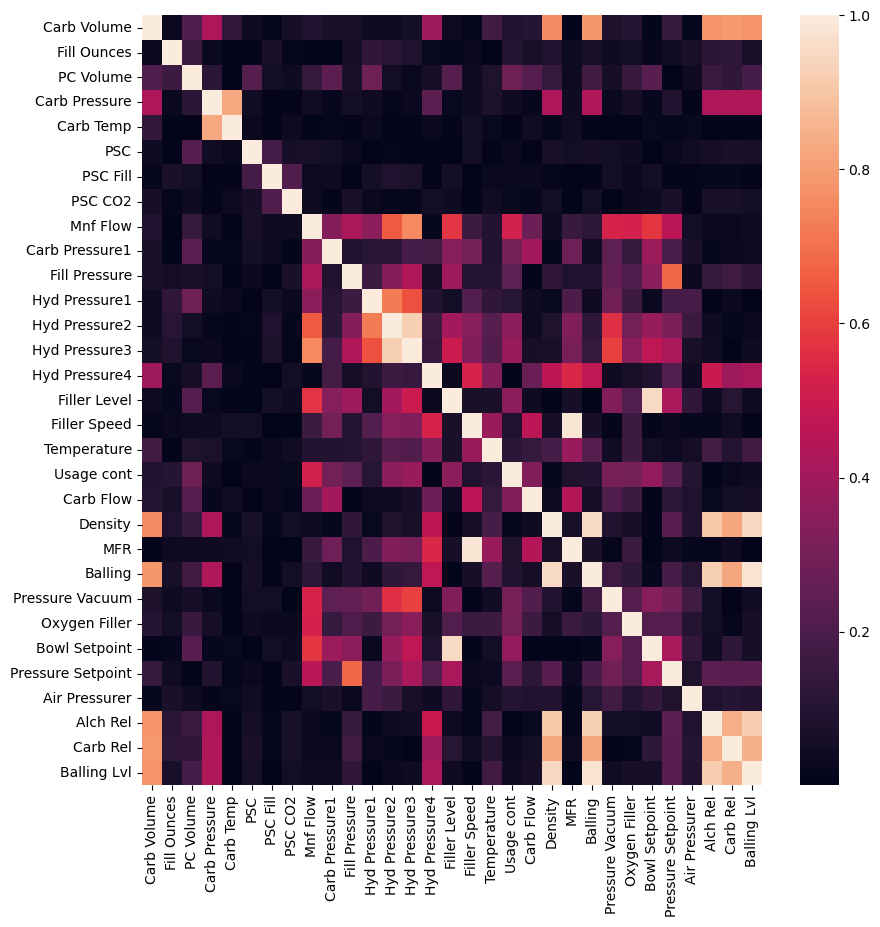

In [15]:
fig, ax = plt.subplots(figsize = (10,10))       
sns.heatmap(abs(X.corr()), ax = ax)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Pipelines for Transformations

In [17]:
def fit_evaluate(
    X_train, y_train, method, 
    CS = False, NZV = False, Corr = False, 
    var_threshold = 0.01,
    params = {}
):    
    
    steps_num = []
    transformed = False
    tuned = False
    
    if CS:
        steps_num.append(('scaleCenter', StandardScaler())) 
    if NZV:
        steps_num.append(('removeNZV', VarianceThreshold(threshold = var_threshold)))
    if Corr:
        corr_matrix = X_train.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
        X_train.drop(to_drop, axis = 1, inplace = True)
    if CS or NZV or Corr:
        transformed = True
        process_num = Pipeline(steps_num)
        
    numerical_features = X_train.select_dtypes(include = 'number').columns.tolist()
    categorical_features = X_train.select_dtypes(exclude = 'number').columns.tolist()
    
    process_cat = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse = False))])
    
    if transformed:
        process_all = [('number', process_num, numerical_features),
                       ('category', process_cat, categorical_features)]
    else:
        process_all = [('category', process_cat, categorical_features)]
    
    full_processor = ColumnTransformer(process_all)
    
    model = Pipeline([('preprocess', full_processor),
                      ('method', method)])
    model.fit(X_train, y_train)
    
    # cv = LeaveOneOut()
    # scores = cross_val_score(
    #     model, X, y,
    #     scoring='neg_mean_absolute_percentage_error',
    #     cv = cv,
    #     n_jobs=-1)
    # loocv = -np.mean(scores)
    
    if len(params) > 0:
        grid = GridSearchCV(model, params, cv = 5)
        grid.fit(X_train, y_train)
        model = grid.best_estimator_
        tuned = model[1]
    
    result = pd.DataFrame(
        {'model': re.findall(r'.*(?=\()', str(method))[0],
         'RMSE': np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
         'Rsquared':r2_score(y_test, model.predict(X_test)),
         'MAE': mean_absolute_error(y_test, model.predict(X_test)),
         'MAPE': mean_absolute_percentage_error(y_test, model.predict(X_test)),
         # 'LOOCV_MAPE': loocv,
         'Transformed': transformed,
         'Scaled': CS,
         'NZV Removed': NZV,
         'MC Removed': Corr,
         'Tuned': str(tuned)},
        index = [0])
    
    return result, model

In [18]:
method = LinearRegression()

In [19]:
import re

In [20]:
re.findall(r'.*(?=\()', str(method))[0]

'LinearRegression'

In [21]:
results = pd.DataFrame()

## OLS
CS, NZV, Corr

In [22]:
ols_raw, ols_raw_model = fit_evaluate(X_train, y_train, LinearRegression())

ols_trans, ols_trans_model = fit_evaluate(
    X_train, y_train, LinearRegression(),
    CS = True, NZV = True, Corr = True
)

results = pd.concat([results, ols_raw, ols_trans])
display(ols_raw, ols_trans)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,LinearRegression,0.160379,0.099775,0.129208,0.015126,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,LinearRegression,0.130391,0.404952,0.100152,0.011745,True,True,True,True,False


## PLS
CS

In [23]:
pls_raw, pls_raw_model = fit_evaluate(X_train, y_train, PLSRegression(n_components = 5))

pls_trans, pls_trans_model = fit_evaluate(
    X_train, y_train, PLSRegression(n_components = 5),
    CS = True
)

results = pd.concat([results, pls_raw, pls_trans])
display(pls_raw, pls_trans)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,PLSRegression,0.163993,0.058739,0.131919,0.015439,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,PLSRegression,0.132002,0.39016,0.101584,0.01191,True,True,False,False,False


### Ridge
CS, NZV

In [24]:
params = {'method__alpha': list(range(1, 10))}

In [25]:
ridge_raw, ridge_raw_model = fit_evaluate(X_train, y_train, Ridge())

ridge_trans, ridge_trans_model = fit_evaluate(
    X_train, y_train, Ridge(),
    CS = True, NZV = True
)

ridge_tuned, ridge_tuned_model = fit_evaluate(
    X_train, y_train, Ridge(),
    CS = True, NZV = True,
    params = params
)

results = pd.concat([results, ridge_raw, ridge_trans, ridge_tuned])
display(ridge_raw, ridge_trans, ridge_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,Ridge,0.16033,0.100323,0.129255,0.015131,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,Ridge,0.130415,0.40473,0.100162,0.011747,True,True,True,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,Ridge,0.130536,0.403627,0.100232,0.011755,True,True,True,False,Ridge(alpha=6)


In [26]:
ridge_tuned_model[1]

Ridge(alpha=6)

## LASSO
CS, NZV

In [27]:
params = {'method__alpha':list(np.linspace(0.01, 0.2, 19))}

In [28]:
lasso_raw, lasso_raw_model = fit_evaluate(X_train, y_train, linear_model.Lasso())

lasso_trans, lasso_trans_model = fit_evaluate(
    X_train, y_train, linear_model.Lasso(), 
    CS = True, NZV = True
)

lasso_tuned, lasso_tuned_model = fit_evaluate(
    X_train, y_train, linear_model.Lasso(), 
    CS = True, NZV = True,
    params = params
)

results = pd.concat([results, lasso_raw, lasso_trans, lasso_tuned])
display(lasso_raw, lasso_trans, lasso_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,Lasso,0.169178,-0.001722,0.137416,0.016086,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,Lasso,0.169178,-0.001722,0.137416,0.016086,True,True,True,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,Lasso,0.139364,0.320232,0.109224,0.012801,True,True,True,False,Lasso(alpha=0.01)


In [29]:
lasso_tuned_model[1]

Lasso(alpha=0.01)

## SVM
CS

In [30]:
params = {
    # 'method__kernel' : ('linear', 'poly', 'rbf'),
    'method__C' : [1, 5, 10],
    'method__degree' : [3, 8],
    'method__coef0' : [0.01, 10, 0.5],
    'method__gamma' : ['auto','scale']
}

In [31]:
svm_raw, svm_raw_model = fit_evaluate(X_train, y_train, SVR())

svm_trans, svm_trans_model = fit_evaluate(
    X_train, y_train, SVR(), 
    CS = True, NZV = True
)

svm_tuned, svm_tuned_model = fit_evaluate(
    X_train, y_train, SVR(), 
    CS = True, NZV = True,
    params = params
)

results = pd.concat([results, svm_raw, svm_trans, svm_tuned])
display(svm_raw, svm_trans, svm_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,SVR,0.160723,0.09591,0.12971,0.015196,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,SVR,0.11542,0.53375,0.088419,0.010356,True,True,True,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,SVR,0.115693,0.531543,0.088318,0.010346,True,True,True,False,"SVR(C=1, coef0=0.01, gamma='auto')"


In [32]:
svm_tuned_model[1]

SVR(C=1, coef0=0.01, gamma='auto')

## Neural Network - MLP
CS, NZV, Corr

In [33]:
params = {
    'method__hidden_layer_sizes': [(1,),(50,)],
    'method__solver': ['lbfgs', 'sgd', 'adam'],
    'method__alpha': [0.00001, 0.00005, 0.0005]
}

In [34]:
nn_raw, nn_raw_model = fit_evaluate(
    X_train, y_train, 
    MLPRegressor(random_state = 42)
)

nn_trans, nn_trans_model = fit_evaluate(
    X_train, y_train, 
    MLPRegressor(random_state = 42),
    CS = True, NZV = True, Corr = True
)

nn_tuned, nn_tuned_model = fit_evaluate(
    X_train, y_train, 
    MLPRegressor(random_state = 42),
    CS = True, NZV = True, Corr = True,
    params = params
)

results = pd.concat([results, nn_raw, nn_trans, nn_tuned])
display(nn_raw, nn_trans, nn_tuned)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,MLPRegressor,0.160271,0.100988,0.128993,0.015099,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,MLPRegressor,0.399666,-4.590517,0.31402,0.036762,True,True,True,True,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,MLPRegressor,0.131836,0.391688,0.09617,0.011274,True,True,True,True,"MLPRegressor(alpha=0.0005, hidden_layer_sizes=..."


In [35]:
nn_tuned_model[1]

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(50,), random_state=42,
             solver='lbfgs')

## KNN
CS, NZV

In [36]:
params = {'method__n_neighbors': list(range(1, 10))}

In [37]:
knn_raw, knn_raw_model = fit_evaluate(X_train, y_train, KNeighborsRegressor())

knn_trans, knn_trans_model = fit_evaluate(
    X_train, y_train, KNeighborsRegressor(),
    CS = True, NZV = True, Corr = False
)

knn_tuned, knn_tuned_model = fit_evaluate(
    X_train, y_train, KNeighborsRegressor(),
    CS = True, NZV = True, Corr = False,
    params = params
)

results = pd.concat([results, knn_raw, knn_trans, knn_tuned])
display(knn_raw, knn_trans, knn_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,KNeighborsRegressor,0.182683,-0.168035,0.143528,0.016929,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,KNeighborsRegressor,0.123318,0.46776,0.090482,0.010624,True,True,True,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,KNeighborsRegressor,0.120107,0.49511,0.088074,0.010344,True,True,True,False,KNeighborsRegressor(n_neighbors=6)


In [38]:
knn_tuned_model[1]

KNeighborsRegressor(n_neighbors=6)

## Single Tree
None

In [39]:
params = {
    'method__splitter':['best','random'],
    'method__max_depth' : [1,3,5,7,9,11,12],
    'method__max_features':['auto','log2','sqrt',None],
    'method__max_leaf_nodes':[None,20,40,60,80]
}

In [40]:
tree_raw, tree_raw_model = fit_evaluate(
    X_train, y_train, 
    DecisionTreeRegressor(random_state = 42)
)

tree_tuned, tree_tuned_model = fit_evaluate(
    X_train, y_train, 
    DecisionTreeRegressor(random_state = 42),
    CS = True, NZV = True,
    params = params
)

results = pd.concat([results, tree_raw, tree_tuned])
display(tree_raw, tree_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,DecisionTreeRegressor,0.160334,0.100277,0.129263,0.015132,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,DecisionTreeRegressor,0.125036,0.45282,0.090536,0.010612,True,True,True,False,"DecisionTreeRegressor(max_depth=11, max_featur..."


In [41]:
tree_tuned_model[1]

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=40,
                      random_state=42)

## Random Forest
None

In [42]:
params = {
    'method__bootstrap': [True],
    'method__max_depth': [8, 12, 16],
    'method__max_features': [3, 6, 9, 12],
    'method__n_estimators': [300, 500, 700]
}

In [43]:
rf_raw, rf_raw_model = fit_evaluate(
    X_train, y_train, 
    RandomForestRegressor(random_state = 42)
)

rf_tuned, rf_tuned_model = fit_evaluate(
    X_train, y_train, 
    RandomForestRegressor(random_state = 42),
    CS = True, NZV = True,
    params = params
)

results = pd.concat([results, rf_raw, rf_tuned])
display(rf_raw, rf_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,RandomForestRegressor,0.160314,0.100502,0.129236,0.01513,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,RandomForestRegressor,0.098638,0.65948,0.070381,0.008248,True,True,True,False,"RandomForestRegressor(max_depth=16, max_featur..."


In [44]:
rf_tuned_model[1]

RandomForestRegressor(max_depth=16, max_features=12, n_estimators=700,
                      random_state=42)

## Gradient Boosting
None

In [45]:
params = {
    'method__learning_rate': [0.1, 0.05, 0.02],
    'method__max_depth': [8, 12, 16],
    'method__max_features': [3, 6, 9, 12],
    'method__n_estimators': [300, 500, 700]
}

In [46]:
boost_raw, boost_raw_model = fit_evaluate(
    X_train, y_train,
    GradientBoostingRegressor(random_state = 42)
)

boost_tuned, boost_tuned_model = fit_evaluate(
    X_train, y_train,
    GradientBoostingRegressor(random_state = 42),
    CS = True, NZV = True,
    params = params
)

results = pd.concat([results, boost_raw, boost_tuned])
display(boost_raw, boost_tuned)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,GradientBoostingRegressor,0.160334,0.100278,0.129263,0.015132,False,False,False,False,False


,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,GradientBoostingRegressor,0.093906,0.691364,0.065705,0.007694,True,True,True,False,"GradientBoostingRegressor(learning_rate=0.02, ..."


In [47]:
boost_tuned_model[1]

GradientBoostingRegressor(learning_rate=0.02, max_depth=12, max_features=9,
                          n_estimators=700, random_state=42)

## Results

In [48]:
results = results.reset_index(drop = True)

results = (results
    #        [
    # ~(results.duplicated('model', keep = False)) |
    # (results['Transformed'] != False)]
 .sort_values('MAPE')
 .reset_index(drop = True)
)

In [49]:
results

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Scaled,NZV Removed,MC Removed,Tuned
0,GradientBoostingRegressor,0.093906,0.691364,0.065705,0.007694,True,True,True,False,"GradientBoostingRegressor(learning_rate=0.02, ..."
1,RandomForestRegressor,0.098638,0.659480,0.070381,0.008248,True,True,True,False,"RandomForestRegressor(max_depth=16, max_featur..."
2,KNeighborsRegressor,0.120107,0.495110,0.088074,0.010344,True,True,True,False,KNeighborsRegressor(n_neighbors=6)
3,SVR,0.115693,0.531543,0.088318,0.010346,True,True,True,False,"SVR(C=1, coef0=0.01, gamma='auto')"
4,SVR,0.115420,0.533750,0.088419,0.010356,True,True,True,False,False
5,DecisionTreeRegressor,0.125036,0.452820,0.090536,0.010612,True,True,True,False,"DecisionTreeRegressor(max_depth=11, max_featur..."
6,KNeighborsRegressor,0.123318,0.467760,0.090482,0.010624,True,True,True,False,False
7,MLPRegressor,0.131836,0.391688,0.096170,0.011274,True,True,True,True,"MLPRegressor(alpha=0.0005, hidden_layer_sizes=..."
8,LinearRegression,0.130391,0.404952,0.100152,0.011745,True,True,True,True,False
9,Ridge,0.130415,0.404730,0.100162,0.011747,True,True,True,False,False


In [50]:
def true_false(row):
    if row['Tuned'] == 'False':
        return False
    else:
        return True

(results[~results.duplicated('model', keep = 'first')]
 .drop(['Scaled', 'NZV Removed', 'MC Removed'], axis = 1)
 .assign(Tuned = results.apply(true_false, axis=1))
)

,model,RMSE,Rsquared,MAE,MAPE,Transformed,Tuned
0,GradientBoostingRegressor,0.093906,0.691364,0.065705,0.007694,True,True
1,RandomForestRegressor,0.098638,0.659480,0.070381,0.008248,True,True
2,KNeighborsRegressor,0.120107,0.495110,0.088074,0.010344,True,True
3,SVR,0.115693,0.531543,0.088318,0.010346,True,True
5,DecisionTreeRegressor,0.125036,0.452820,0.090536,0.010612,True,True
7,MLPRegressor,0.131836,0.391688,0.096170,0.011274,True,True
8,LinearRegression,0.130391,0.404952,0.100152,0.011745,True,False
9,Ridge,0.130415,0.404730,0.100162,0.011747,True,False
11,PLSRegression,0.132002,0.390160,0.101584,0.011910,True,False
12,Lasso,0.139364,0.320232,0.109224,0.012801,True,True


In [51]:
ranks = (results
 .assign(
     RMSE_rank = results['RMSE'].rank(),
     R2_rank = results['Rsquared'].rank(ascending = False),
     MAE_rank = results['MAE'].rank(),
     MAPE_rank = results['MAPE'].rank() # ,
     # LOOCV_rank = results['LOOCV_MAPE'].rank()
 )
 .filter(
     ['model',
      'RMSE_rank', 
      'R2_rank',
      'MAE_rank',
      'MAPE_rank' #,
      # 'LOOCV_rank'
     ], axis = 1
 )
 .assign(Avg_rank = lambda x: x.mean(axis = 1))
 .sort_values('Avg_rank')
)

/var/folders/yd/dq0ds2hn6rs32t4__d98lrsc0000gn/T/ipykernel_6181/1974517443.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  .assign(Avg_rank = lambda x: x.mean(axis = 1))


In [52]:
(results
 .drop(['Transformed','Scaled','NZV Removed','MC Removed'], axis = 1)
 .merge(ranks[['model','Avg_rank']], how = 'left')
)

,model,RMSE,Rsquared,MAE,MAPE,Tuned,Avg_rank
0,GradientBoostingRegressor,0.093906,0.691364,0.065705,0.007694,"GradientBoostingRegressor(learning_rate=0.02, ...",1.00
1,GradientBoostingRegressor,0.093906,0.691364,0.065705,0.007694,"GradientBoostingRegressor(learning_rate=0.02, ...",17.50
2,RandomForestRegressor,0.098638,0.659480,0.070381,0.008248,"RandomForestRegressor(max_depth=16, max_featur...",2.00
3,RandomForestRegressor,0.098638,0.659480,0.070381,0.008248,"RandomForestRegressor(max_depth=16, max_featur...",15.50
4,KNeighborsRegressor,0.120107,0.495110,0.088074,0.010344,KNeighborsRegressor(n_neighbors=6),4.00
...,...,...,...,...,...,...,...
60,KNeighborsRegressor,0.182683,-0.168035,0.143528,0.016929,False,6.25
61,KNeighborsRegressor,0.182683,-0.168035,0.143528,0.016929,False,24.00
62,MLPRegressor,0.399666,-4.590517,0.314020,0.036762,False,9.50
63,MLPRegressor,0.399666,-4.590517,0.314020,0.036762,False,14.00


In [53]:
ranks

,model,RMSE_rank,R2_rank,MAE_rank,MAPE_rank,Avg_rank
0,GradientBoostingRegressor,1.0,1.0,1.0,1.0,1.00
1,RandomForestRegressor,2.0,2.0,2.0,2.0,2.00
2,KNeighborsRegressor,5.0,5.0,3.0,3.0,4.00
3,SVR,4.0,4.0,4.0,4.0,4.00
4,SVR,3.0,3.0,5.0,5.0,4.00
6,KNeighborsRegressor,6.0,6.0,6.0,7.0,6.25
5,DecisionTreeRegressor,7.0,7.0,7.0,6.0,6.75
8,LinearRegression,8.0,8.0,9.0,9.0,8.50
7,MLPRegressor,11.0,11.0,8.0,8.0,9.50
9,Ridge,9.0,9.0,10.0,10.0,9.50


## Forecasts

In [54]:
data_prediction = data_prediction.drop('PH', axis = 1)
imputer = IterativeImputer(random_state = 42, max_iter = 50)
data_prediction.iloc[:, 1:] = imputer.fit_transform(data_prediction.iloc[:, 1:])

In [55]:
svm_forecast = svm_tuned_model.predict(data_prediction)

In [56]:
dan_forecast = pd.read_excel('data/StudentEvaluation- TO PREDICT_DC.xlsx', engine = 'openpyxl')

In [57]:
dan_forecast['PH']

0      8.639846
1      8.453604
2      8.570464
3      8.612057
4      8.497049
         ...   
262    8.519595
263    8.607807
264    8.325490
265    8.342424
266    8.261600
Name: PH, Length: 267, dtype: float64

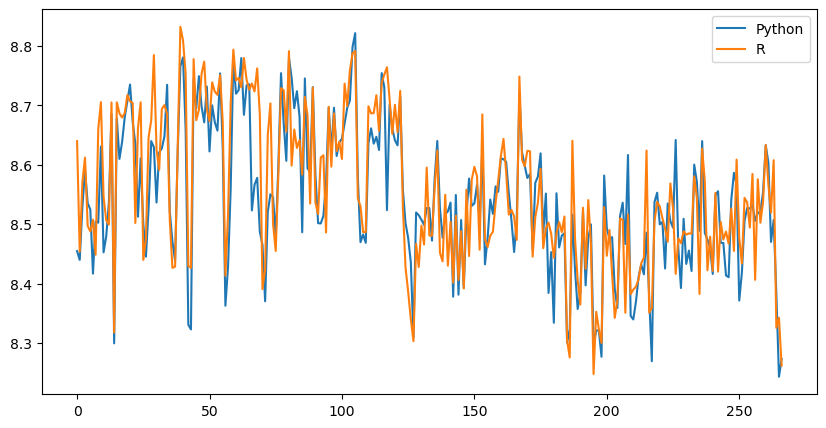

In [58]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(svm_forecast, label = 'Python')
ax.plot(dan_forecast['PH'], label = 'R')
ax.legend()
plt.show()

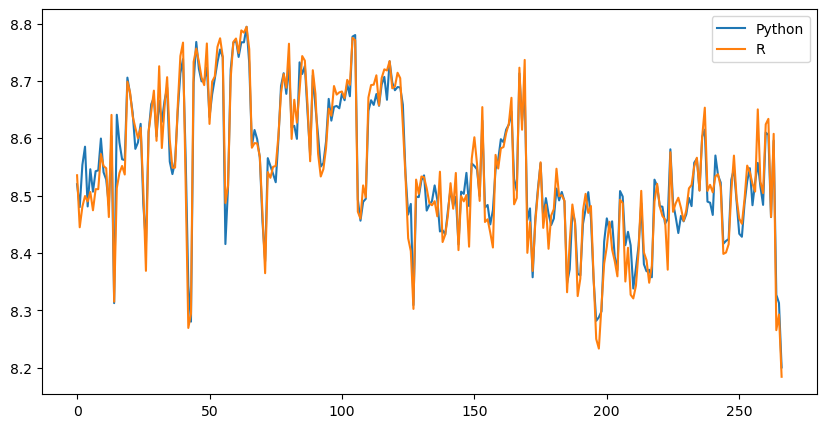

In [59]:
rf_forecast = rf_tuned_model.predict(data_prediction)
dan_forecast_rf = pd.read_excel('data/StudentEvaluation- TO PREDICT_DC2.xlsx', engine = 'openpyxl')

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(rf_forecast, label = 'Python')
ax.plot(dan_forecast_rf['PH'], label = 'R')
ax.legend()
plt.show()

## Additional Plots

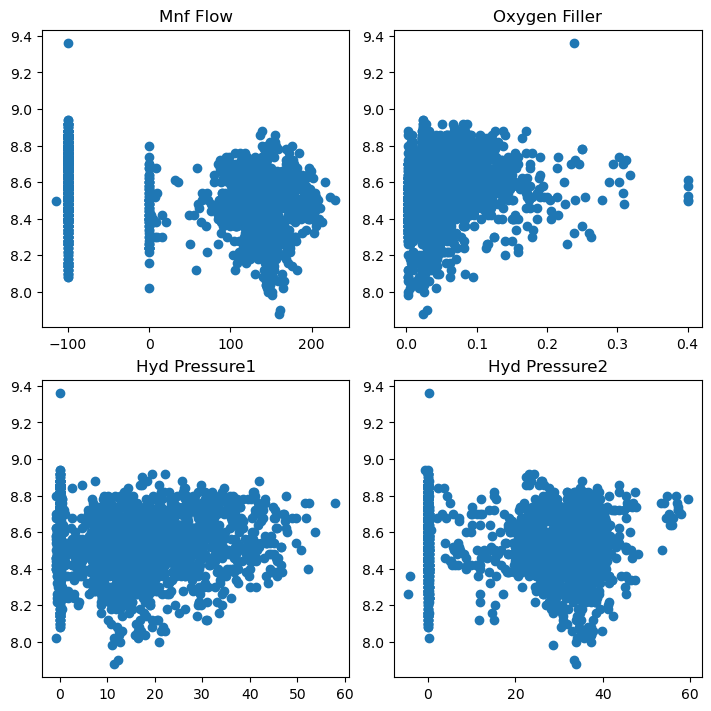

In [60]:
imp_vars = ['Mnf Flow', 'Oxygen Filler', 'Hyd Pressure1', 'Hyd Pressure2']

fig, axes = plt.subplots(2, 2, figsize = (7,7), constrained_layout = True)

for col, ax in zip(imp_vars, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.scatter(X[col], y)
        ax.set_title(col)

plt.show()

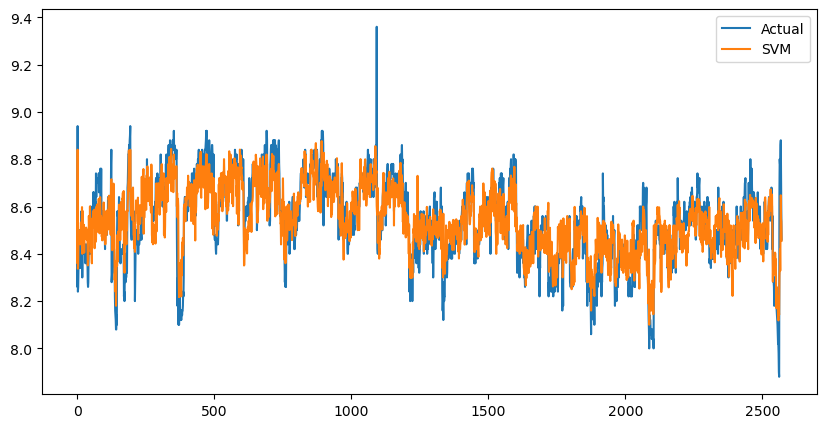

In [61]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(y, label = 'Actual')
ax.plot(svm_tuned_model.predict(X), label = 'SVM')
ax.legend()
plt.show()

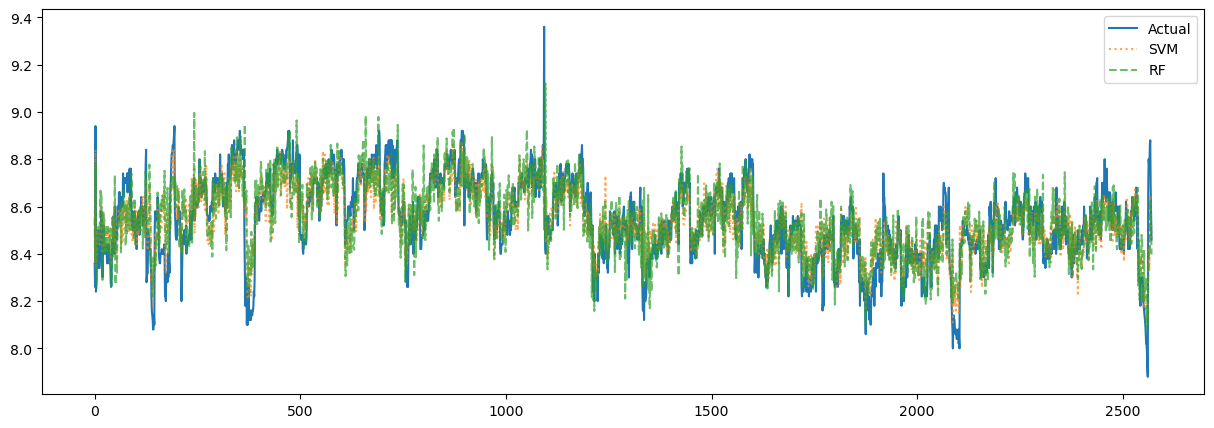

In [62]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(y, label = 'Actual')
ax.plot(
    svm_tuned_model.predict(X),
    label = 'SVM',
    linestyle = ':',
    alpha = 0.7
)
ax.plot(
    nn_tuned_model.predict(X), 
    label = 'RF', 
    linestyle = '--',
    alpha = 0.7
)
ax.legend()
plt.show()

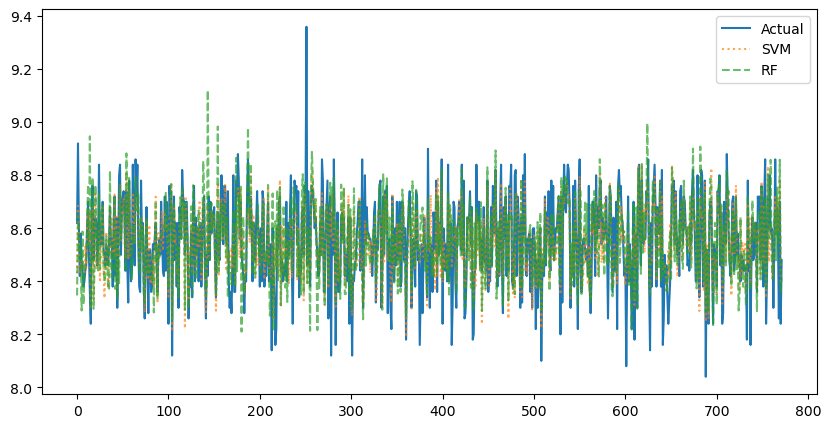

In [63]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(y_test.reset_index(drop = True), label = 'Actual')
ax.plot(
    svm_tuned_model.predict(X_test),
    label = 'SVM',
    linestyle = ':',
    alpha = 0.7
)
ax.plot(
    nn_tuned_model.predict(X_test), 
    label = 'RF', 
    linestyle = '--',
    alpha = 0.7
)
ax.legend()
plt.show()

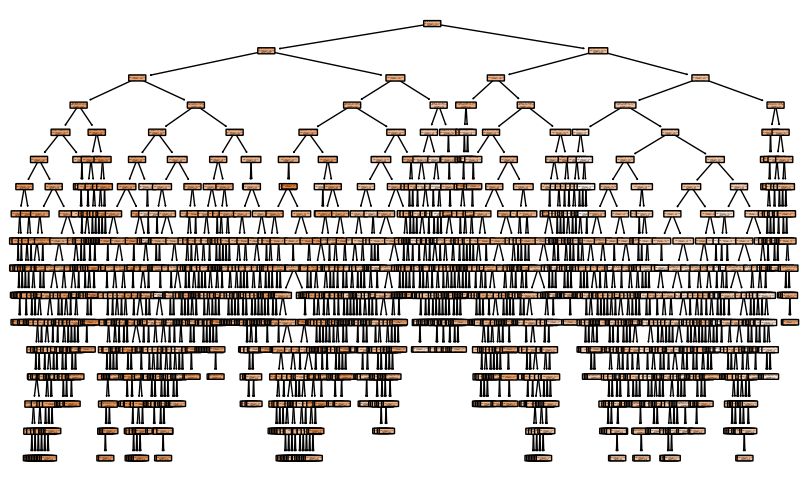

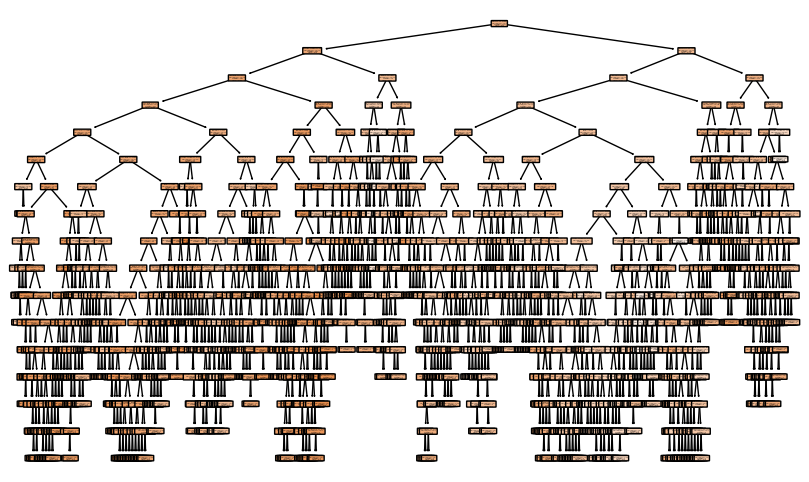

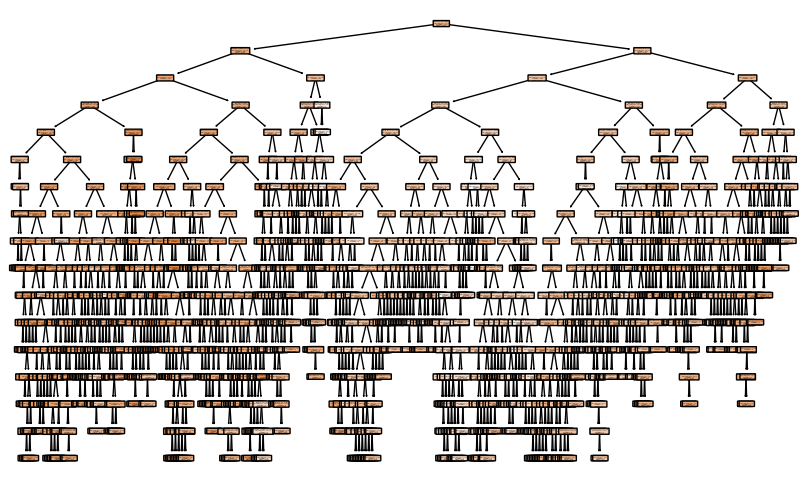

In [64]:
for tree in range(3):

    fig = plt.figure(figsize=(10, 6))

    plot_tree(
        rf_tuned_model[1].estimators_[tree], 
        feature_names = X.columns,
        filled = True, 
        impurity = True, 
        rounded = True
    )

    plt.show()